In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
file = "../Resources/police_reports_clean.csv"

police_reports = pd.read_csv(file)
police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426477,2023-03-12 23:15:00,2023-03-12,2023,Sunday,2023-03-12 23:49:00,Initial,False,Burglary,Burglary - Commercial,"Burglary, Store, Forcible Entry",Open or Active,20TH AVE \ WINSTON DR,Taraval,Lakeshore,37.726950,-122.476039,23:15:00,23:49:00,2023-03-12
426478,2023-03-13 14:28:00,2023-03-13,2023,Monday,2023-03-13 14:30:00,Initial,False,Non-Criminal,Non-Criminal,Aided Case,Open or Active,03RD ST \ HOLLISTER AVE,Bayview,Bayview Hunters Point,37.721716,-122.395944,14:28:00,14:30:00,2023-03-13
426479,2023-03-13 17:30:00,2023-03-13,2023,Monday,2023-03-13 19:21:00,Initial,False,Weapons Offense,Weapons Offense,"Weapon, Deadly, Imitation or Laser Scope, Exhi...",Open or Active,GEARY BLVD \ PARK PRESIDIO BLVD,Richmond,Outer Richmond,37.780656,-122.472312,17:30:00,19:21:00,2023-03-13
426480,2023-03-12 18:00:00,2023-03-12,2023,Sunday,2023-03-12 23:21:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,GERMANIA ST \ FILLMORE ST,Park,Hayes Valley,37.770709,-122.430167,18:00:00,23:21:00,2023-03-12


In [7]:
police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426482 entries, 0 to 426481
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        426482 non-null  object 
 1   Incident Date            426482 non-null  object 
 2   Incident Year            426482 non-null  int64  
 3   Incident Day of Week     426482 non-null  object 
 4   Report Datetime          426482 non-null  object 
 5   Report Type Description  426482 non-null  object 
 6   Filed Online             426482 non-null  bool   
 7   Incident Category        426482 non-null  object 
 8   Incident Subcategory     426482 non-null  object 
 9   Incident Description     426482 non-null  object 
 10  Resolution               426482 non-null  object 
 11  Intersection             426482 non-null  object 
 12  Police District          426482 non-null  object 
 13  Analysis Neighborhood    426482 non-null  object 
 14  Lati

In [8]:
# converting the following into datetime format in order to group by month
police_reports["Incident Datetime"] = pd.to_datetime(police_reports["Incident Datetime"])
police_reports["Report Datetime"] = pd.to_datetime(police_reports["Report Datetime"])

In [16]:
# changing Date and Time data types
police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

In [17]:
# adjusting for reports in 2023
incident_reports = police_reports.loc[police_reports["Incident Year"]<2023]
incident_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426254,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20
426255,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24
426256,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13
426257,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19


In [18]:
# making sure it kept the datetime
incident_reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411298 entries, 0 to 426258
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        411298 non-null  datetime64[ns]
 1   Incident Date            411298 non-null  object        
 2   Incident Year            411298 non-null  int64         
 3   Incident Day of Week     411298 non-null  object        
 4   Report Datetime          411298 non-null  datetime64[ns]
 5   Report Type Description  411298 non-null  object        
 6   Filed Online             411298 non-null  bool          
 7   Incident Category        411298 non-null  object        
 8   Incident Subcategory     411298 non-null  object        
 9   Incident Description     411298 non-null  object        
 10  Resolution               411298 non-null  object        
 11  Intersection             411298 non-null  object        
 12  Police District 

In [19]:
crime_counts = incident_reports.groupby(["Incident Category"]).count()["Incident Datetime"]

In [27]:
# shows the number of crimes per month
month_groupby = incident_reports.groupby([incident_reports['Incident Datetime'].dt.month]).count()["Incident Datetime"]
month_groupby = pd.DataFrame(month_groupby)
# # month_groupby = month_groupby.sort_values("Incident Datetime", ascending=False)
month_groupby

# syntax: (campaign.groupby([campaign['date'].dt.month]).agg (avg_interviews_month = ('num_interviews' , 'mean')).round())

,Incident Datetime
Incident Datetime,
1,35011
2,31753
3,33164
4,32034
5,33971
6,33780
7,35871
8,35871
9,35496


In [37]:
# shows the number of crimes per month, per year
year_month_groupby = incident_reports.groupby([incident_reports['Incident Datetime'].dt.year, 
                                               incident_reports['Incident Datetime'].dt.month]).count()
["Report Datetime"]
year_month_groupby = pd.DataFrame(year_month_groupby)
year_month_groupby

Report Datetime
Incident Datetime Incident Datetime                 
2018              1                             7374
                  2                             6636
                  3                             7118
                  4                             7187
                  5                             7387
                  6                             7206
                  7                             7888
                  8                             7912
                  9                             7435
                  10                            7500
                  11                            6805
                  12                            7133
2019              1                             7075
                  2                             6240
                  3                             6819
                  4                             6950
                  5                             7257
                  6                             7115
                  7                             7607
                  8                             7919
                  9                             7559
                  10                            7997
                  11                            7139
                  12                            7099
2020              1                             7404
                  2                             6808
                  3                             6113
                  4                             5081
                  5                             6044
                  6                             5799
                  7                             6372
                  8                             6067
                  9                             5913
                  10                            6306
                  11                            6308
                  12                            6576
2021              1                             6693
                  2                             5956
                  3                             6135
                  4                             6076
                  5                             6822
                  6                             6930
                  7                             6959
                  8                             6947
                  9                             7180
                  10                            7393
                  11                            7202
                  12                            6716
2022              1                             6465
                  2                             6113
                  3                             6979
                  4                             6740
                  5                             6461
                  6                             6730
                  7                             7045
                  8                             7026
                  9                             7409
                  10                            7130
                  11                            6470
                  12                            6573

In [ ]:
# need to group this by neigborhod
# need crime rate


ValueError: setting an array element with a sequence.

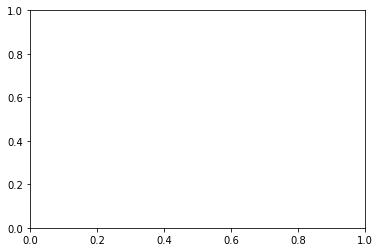

In [36]:
plt.plot(year_month_groupby)